In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv("customers.csv")
customers = pd.DataFrame(customers)

products = pd.read_csv("products.csv")
products = pd.DataFrame(products)

transactions = pd.read_csv("transactions.csv")
transactions = pd.DataFrame(transactions)

# Customers

### Vérification unicité, valeurs nulles, doublons

unique: 
 client_id    8623
sex             2
birth          76
dtype: int64
count: 
 client_id    8623
sex          8623
birth        8623
dtype: int64
null: 
 client_id    0
sex          0
birth        0
dtype: int64


,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


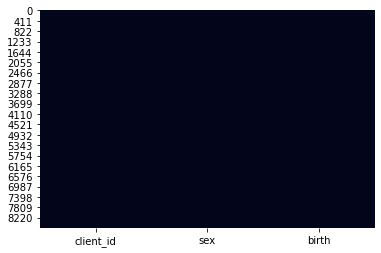

In [3]:
print("unique: \n",customers.nunique(axis=0))
print("count: \n",customers.count())
print("null: \n",customers.isna().sum())
sns.heatmap(customers.isna(), cbar=False)
customers

### Vérification distribution univariée, outliers

,birth
count,8623.000000
mean,1978.280877
std,16.919535
min,1929.000000
25%,1966.000000
50%,1979.000000
75%,1992.000000
max,2004.000000


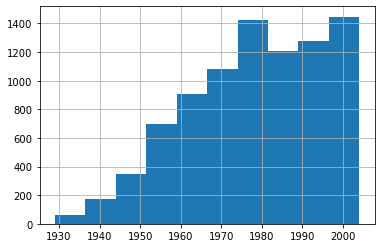

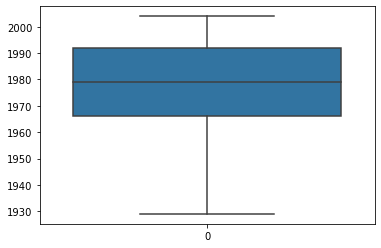

In [4]:
display(customers.describe())
customers['birth'].hist()
plt.show()
sns.boxplot(data=customers['birth'])
plt.show()

# Products

### Vérification unicité, valeurs nulles, doublons

unique: 
 id_prod    3287
price      1455
categ         3
dtype: int64
count: 
 id_prod    3287
price      3287
categ      3287
dtype: int64
null: 
 id_prod    0
price      0
categ      0
dtype: int64


,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


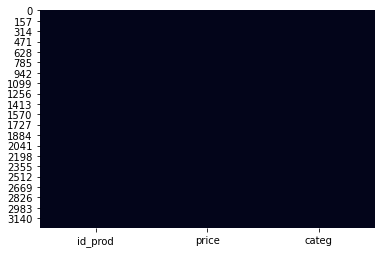

In [5]:
print("unique: \n",products.nunique(axis=0))
print("count: \n",products.count())
print("null: \n",products.isna().sum())
sns.heatmap(products.isna(), cbar=False)
products

### Vérification distribution univariée, outliers

count    3287.000000
mean       21.856641
std        29.847908
min        -1.000000
25%         6.990000
50%        13.060000
75%        22.990000
max       300.000000
Name: price, dtype: float64

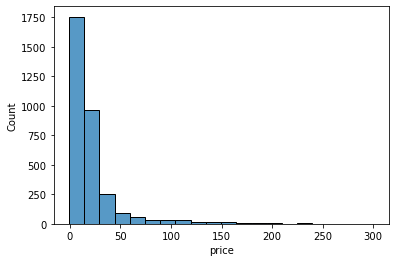

C:\Users\Lucie\Anaconda\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


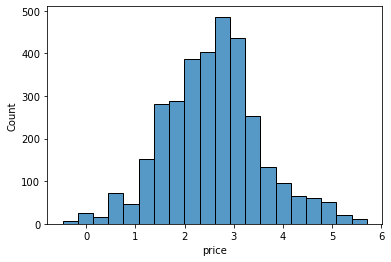

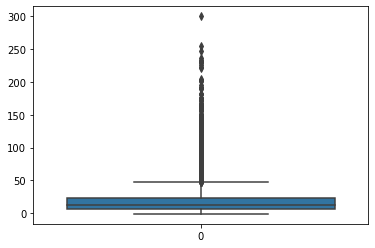

In [6]:
display(products['price'].describe())

sns.histplot(x=products['price'],bins=20)
plt.show()
sns.histplot(x=np.log(products['price']),bins=20)
plt.show()

sns.boxplot(data=products['price'])
plt.show()

### Prix à -1€

In [7]:
strange_prices = products.loc[products['price'] < 0]
strange_prices

,id_prod,price,categ
731,T_0,-1.0,0


Vérification à faire dans les transactions

### Outliers

In [8]:
Q1 = np.percentile(products['price'], 25)
Q3 = np.percentile(products['price'], 75)
IQ = Q3-Q1
low_lim = Q1-1.5*IQ
upp_lim = Q3+1.5*IQ

prices_low = products[products['price']<=low_lim]
prices_upp = products[products['price']>=upp_lim]

print("La limite inférieure est de", round(low_lim))
print("La limite supérieure est de", round(upp_lim))
print('Le nombre de valeurs sortant de la limite inférieure est de', prices_low.shape[0])
print('Le nombre de valeurs sortant de la limite supérieure est de', prices_upp.shape[0])

La limite inférieure est de -17
La limite supérieure est de 47
Le nombre de valeurs sortant de la limite inférieure est de 0
Le nombre de valeurs sortant de la limite supérieure est de 302


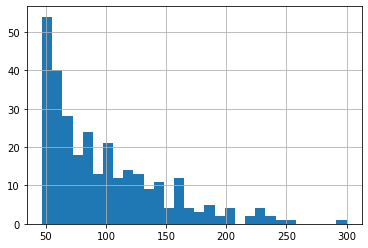

947     300.00
724     254.44
394     247.22
1436    236.99
2779    233.54
1960    231.99
2487    230.04
786     228.11
10      225.17
1896    222.97
1709    220.99
1284    203.99
2464    202.99
3163    201.99
95      201.74
2993    195.99
970     191.99
1675    189.99
2472    188.48
1729    182.30
Name: price, dtype: float64

In [25]:
prices_upp['price'].hist(bins=30)
plt.show()
prices_upp['price'].sort_values(ascending=False).head(20)

# Transactions

### Vérification unicité, valeurs nulles, doublons

unique: 
 id_prod         3267
date          679371
session_id    342316
client_id       8602
dtype: int64
count: 
 id_prod       679532
date          679532
session_id    679532
client_id     679532
dtype: int64
null: 
 id_prod       0
date          0
session_id    0
client_id     0
dtype: int64


,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


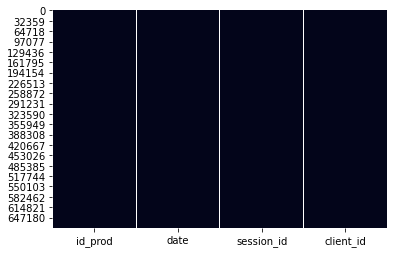

In [10]:
print("unique: \n",transactions.nunique(axis=0))
print("count: \n",transactions.count())
print("null: \n",transactions.isna().sum())
sns.heatmap(transactions.isna(), cbar=False)
transactions

### Vérifications prix à -1€

Vérifications produit T_0

In [11]:
T_0 = transactions.loc[transactions["id_prod"] == "T_0"]

display(T_0)
print("unique: \n",T_0.nunique(axis=0))
print("count: \n",T_0.count())
print("null: \n",T_0.isna().sum())

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


unique: 
 id_prod        1
date          39
session_id     1
client_id      2
dtype: int64
count: 
 id_prod       200
date          200
session_id    200
client_id     200
dtype: int64
null: 
 id_prod       0
date          0
session_id    0
client_id     0
dtype: int64


Vérification clients ct_0/ct_1

In [12]:
ct = transactions.loc[(transactions['client_id'] == 'ct_0') | (transactions['client_id'] == 'ct_1')]

display(ct)
print("unique: \n",ct.nunique(axis=0))
print("count: \n",ct.count())
print("null: \n",ct.isna().sum())

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


unique: 
 id_prod        1
date          39
session_id     1
client_id      2
dtype: int64
count: 
 id_prod       200
date          200
session_id    200
client_id     200
dtype: int64
null: 
 id_prod       0
date          0
session_id    0
client_id     0
dtype: int64


Vérification transactions "test"

In [13]:
test_loc = transactions.loc[transactions["date"].str.contains("test")]

display(test_loc)
print("unique: \n",test_loc.nunique(axis=0))
print("count: \n",test_loc.count())
print("null: \n",test_loc.isna().sum())

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


unique: 
 id_prod        1
date          39
session_id     1
client_id      2
dtype: int64
count: 
 id_prod       200
date          200
session_id    200
client_id     200
dtype: int64
null: 
 id_prod       0
date          0
session_id    0
client_id     0
dtype: int64


## Mise de côté des tests

In [14]:
transact_clean = transactions.drop(test_loc.index)
transact_clean

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


### Vérification des doublons

DF Transactions original

In [15]:
doublons = transactions[transactions.duplicated()]

print("unique: \n",doublons.nunique(axis=0))
print("count: \n",doublons.count())
print("null: \n",doublons.isna().sum())
doublons

unique: 
 id_prod        1
date          36
session_id     1
client_id      2
dtype: int64
count: 
 id_prod       126
date          126
session_id    126
client_id     126
dtype: int64
null: 
 id_prod       0
date          0
session_id    0
client_id     0
dtype: int64


,id_prod,date,session_id,client_id
27778,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
52424,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
96687,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
130188,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
139339,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_1
...,...,...,...,...
653098,T_0,test_2021-03-01 02:30:02.237432,s_0,ct_0
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


DF sans les "test"

In [16]:
doublons = transact_clean[transact_clean.duplicated()]

print("unique: \n",doublons.nunique(axis=0))
print("count: \n",doublons.count())
print("null: \n",doublons.isna().sum())
doublons

unique: 
 id_prod       0
date          0
session_id    0
client_id     0
dtype: int64
count: 
 id_prod       0
date          0
session_id    0
client_id     0
dtype: int64
null: 
 id_prod       0
date          0
session_id    0
client_id     0
dtype: int64


,id_prod,date,session_id,client_id


## Séparation des timestamp pour avoir des dates exploitables

In [17]:
transact_clean[['date','timestamp']] = transact_clean.date.str.split(" ",expand=True)
transact_clean

,id_prod,date,session_id,client_id,timestamp
0,0_1518,2022-05-20,s_211425,c_103,13:21:29.043970
1,1_251,2022-02-02,s_158752,c_8534,07:55:19.149409
2,0_1277,2022-06-18,s_225667,c_6714,15:44:33.155329
3,2_209,2021-06-24,s_52962,c_6941,04:19:29.835891
4,0_1509,2023-01-11,s_325227,c_4232,08:22:08.194479
...,...,...,...,...,...
679527,0_1551,2022-01-15,s_150195,c_8489,13:05:06.246925
679528,1_639,2022-03-19,s_181434,c_4370,16:03:23.429229
679529,0_1425,2022-12-20,s_314704,c_304,04:33:37.584749
679530,0_1994,2021-07-16,s_63204,c_2227,20:36:35.350579


In [18]:
transact_clean['date'] = pd.to_datetime(transact_clean['date'],yearfirst=True)
transact_clean

,id_prod,date,session_id,client_id,timestamp
0,0_1518,2022-05-20,s_211425,c_103,13:21:29.043970
1,1_251,2022-02-02,s_158752,c_8534,07:55:19.149409
2,0_1277,2022-06-18,s_225667,c_6714,15:44:33.155329
3,2_209,2021-06-24,s_52962,c_6941,04:19:29.835891
4,0_1509,2023-01-11,s_325227,c_4232,08:22:08.194479
...,...,...,...,...,...
679527,0_1551,2022-01-15,s_150195,c_8489,13:05:06.246925
679528,1_639,2022-03-19,s_181434,c_4370,16:03:23.429229
679529,0_1425,2022-12-20,s_314704,c_304,04:33:37.584749
679530,0_1994,2021-07-16,s_63204,c_2227,20:36:35.350579


# Jointure

unique: 
 id_prod         3266
date             730
session_id    342315
client_id       8600
timestamp     337816
sex                2
birth             76
price           1442
categ              3
dtype: int64
count: 
 id_prod       679332
date          679332
session_id    679332
client_id     679332
timestamp     679332
sex           679332
birth         679332
price         679111
categ         679111
dtype: int64
null: 
 id_prod         0
date            0
session_id      0
client_id       0
timestamp       0
sex             0
birth           0
price         221
categ         221
dtype: int64


,id_prod,date,session_id,client_id,timestamp,sex,birth,price,categ
0,0_1518,2022-05-20,s_211425,c_103,13:21:29.043970,f,1986,4.18,0.0
1,1_251,2022-02-02,s_158752,c_8534,07:55:19.149409,m,1988,15.99,1.0
2,0_1277,2022-06-18,s_225667,c_6714,15:44:33.155329,f,1968,7.99,0.0
3,2_209,2021-06-24,s_52962,c_6941,04:19:29.835891,m,2000,69.99,2.0
4,0_1509,2023-01-11,s_325227,c_4232,08:22:08.194479,m,1980,4.99,0.0
...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15,s_150195,c_8489,13:05:06.246925,f,1951,12.99,0.0
679328,1_639,2022-03-19,s_181434,c_4370,16:03:23.429229,f,1977,10.99,1.0
679329,0_1425,2022-12-20,s_314704,c_304,04:33:37.584749,f,1988,12.99,0.0
679330,0_1994,2021-07-16,s_63204,c_2227,20:36:35.350579,m,1986,4.98,0.0


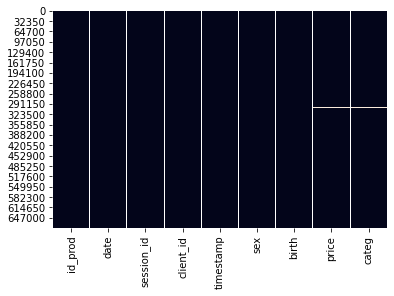

In [19]:
merge = transact_clean.merge(customers, on='client_id', how='left').merge(products, on='id_prod', how='left')

data = merge.copy()
print("unique: \n",data.nunique(axis=0))
print("count: \n",data.count())
print("null: \n",data.isna().sum())
sns.heatmap(data.isna(), cbar=False)
data

## Vérification des transactions sans prix/categ

In [20]:
no_price = data.loc[data['price'].isna()]
no_categ = data.loc[data['categ'].isna()]

print("unique: \n",no_price.nunique(axis=0))
print("\n unique: \n",no_categ.nunique(axis=0))
display(no_price)
display(no_categ)

unique: 
 id_prod         1
date          194
session_id    221
client_id     100
timestamp     103
sex             2
birth          35
price           0
categ           0
dtype: int64

 unique: 
 id_prod         1
date          194
session_id    221
client_id     100
timestamp     103
sex             2
birth          35
price           0
categ           0
dtype: int64


,id_prod,date,session_id,client_id,timestamp,sex,birth,price,categ
2633,0_2245,2022-09-23,s_272266,c_4746,07:22:38.636773,m,1940,NaN,NaN
10103,0_2245,2022-07-23,s_242482,c_6713,09:24:14.133889,f,1963,NaN,NaN
11723,0_2245,2022-12-03,s_306338,c_5108,03:26:35.696673,m,1978,NaN,NaN
15670,0_2245,2021-08-16,s_76493,c_1391,11:33:25.481411,m,1991,NaN,NaN
16372,0_2245,2022-07-16,s_239078,c_7954,05:53:01.627491,m,1973,NaN,NaN
...,...,...,...,...,...,...,...,...,...
669533,0_2245,2021-08-25,s_80395,c_131,09:06:03.504061,m,1981,NaN,NaN
670484,0_2245,2022-03-06,s_175311,c_4167,19:59:19.462288,f,1979,NaN,NaN
671088,0_2245,2022-05-16,s_209381,c_4453,11:35:20.319501,m,1981,NaN,NaN
675480,0_2245,2022-02-11,s_163405,c_1098,09:05:43.952857,m,1986,NaN,NaN


,id_prod,date,session_id,client_id,timestamp,sex,birth,price,categ
2633,0_2245,2022-09-23,s_272266,c_4746,07:22:38.636773,m,1940,NaN,NaN
10103,0_2245,2022-07-23,s_242482,c_6713,09:24:14.133889,f,1963,NaN,NaN
11723,0_2245,2022-12-03,s_306338,c_5108,03:26:35.696673,m,1978,NaN,NaN
15670,0_2245,2021-08-16,s_76493,c_1391,11:33:25.481411,m,1991,NaN,NaN
16372,0_2245,2022-07-16,s_239078,c_7954,05:53:01.627491,m,1973,NaN,NaN
...,...,...,...,...,...,...,...,...,...
669533,0_2245,2021-08-25,s_80395,c_131,09:06:03.504061,m,1981,NaN,NaN
670484,0_2245,2022-03-06,s_175311,c_4167,19:59:19.462288,f,1979,NaN,NaN
671088,0_2245,2022-05-16,s_209381,c_4453,11:35:20.319501,m,1981,NaN,NaN
675480,0_2245,2022-02-11,s_163405,c_1098,09:05:43.952857,m,1986,NaN,NaN


Vérification du produit 0_2245

In [21]:
prod_noprice = products.loc[products['id_prod'] == '0_2245']
prod_noprice

,id_prod,price,categ


==> n'apparait pas dans la table de produits

## Suppression des lignes sans prix/categ

unique: 
 id_prod         3265
date             730
session_id    342275
client_id       8600
timestamp     337713
sex                2
birth             76
price           1442
categ              3
dtype: int64
count: 
 id_prod       679111
date          679111
session_id    679111
client_id     679111
timestamp     679111
sex           679111
birth         679111
price         679111
categ         679111
dtype: int64
null: 
 id_prod       0
date          0
session_id    0
client_id     0
timestamp     0
sex           0
birth         0
price         0
categ         0
dtype: int64


,id_prod,date,session_id,client_id,timestamp,sex,birth,price,categ
0,0_1518,2022-05-20,s_211425,c_103,13:21:29.043970,f,1986,4.18,0.0
1,1_251,2022-02-02,s_158752,c_8534,07:55:19.149409,m,1988,15.99,1.0
2,0_1277,2022-06-18,s_225667,c_6714,15:44:33.155329,f,1968,7.99,0.0
3,2_209,2021-06-24,s_52962,c_6941,04:19:29.835891,m,2000,69.99,2.0
4,0_1509,2023-01-11,s_325227,c_4232,08:22:08.194479,m,1980,4.99,0.0
...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15,s_150195,c_8489,13:05:06.246925,f,1951,12.99,0.0
679328,1_639,2022-03-19,s_181434,c_4370,16:03:23.429229,f,1977,10.99,1.0
679329,0_1425,2022-12-20,s_314704,c_304,04:33:37.584749,f,1988,12.99,0.0
679330,0_1994,2021-07-16,s_63204,c_2227,20:36:35.350579,m,1986,4.98,0.0


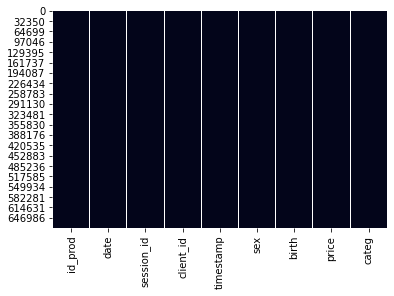

In [22]:
data = data.dropna(0,subset=['price'])

print("unique: \n",data.nunique(axis=0))
print("count: \n",data.count())
print("null: \n",data.isna().sum())
sns.heatmap(data.isna(), cbar=False)
data

### Vérification des clients/produits qui n'apparaissent pas dans les transactions

In [23]:
no_products = products.merge(transact_clean, how='outer', on='id_prod')
no_products = no_products.loc[no_products['date'].isna()]

no_clients = customers.merge(transact_clean,how='outer', on='client_id')
no_clients = no_clients.loc[no_clients['date'].isna()]

display(no_products)
display(no_clients)

,id_prod,price,categ,date,session_id,client_id,timestamp
39705,0_1016,35.06,0.0,NaT,NaN,NaN,NaN
62805,0_1780,1.67,0.0,NaT,NaN,NaN,NaN
162679,T_0,-1.00,0.0,NaT,NaN,NaN,NaN
162766,0_1062,20.08,0.0,NaT,NaN,NaN,NaN
177523,0_1119,2.99,0.0,NaT,NaN,NaN,NaN
181173,0_1014,1.15,0.0,NaT,NaN,NaN,NaN
188022,1_0,31.82,1.0,NaT,NaN,NaN,NaN
230469,0_1318,20.92,0.0,NaT,NaN,NaN,NaN
253466,0_1800,22.05,0.0,NaT,NaN,NaN,NaN
290410,0_1645,2.99,0.0,NaT,NaN,NaN,NaN


,client_id,sex,birth,id_prod,date,session_id,timestamp
59493,c_8253,f,2001,NaN,NaT,NaN,NaN
200286,c_3789,f,1997,NaN,NaT,NaN,NaN
218173,c_4406,f,1998,NaN,NaT,NaN,NaN
218174,ct_0,f,2001,NaN,NaT,NaN,NaN
220389,c_2706,f,1967,NaN,NaT,NaN,NaN
225539,c_3443,m,1959,NaN,NaT,NaN,NaN
248410,c_4447,m,1956,NaN,NaT,NaN,NaN
248966,c_3017,f,1992,NaN,NaT,NaN,NaN
261025,c_4086,f,1992,NaN,NaT,NaN,NaN
313134,c_6930,m,2004,NaN,NaT,NaN,NaN


### Enregistrement de la table de travail

In [24]:
data.to_csv("data_P6.csv",index=False)